In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os
sys.path.append("../../")

In [3]:
from utils.transformer import  DataTransformer
from utils.dataset import Dataset
import metrics
from sklearn.metrics import accuracy_score

In [4]:
train_dset = Dataset(
    dataset_name="texas",
    dataset_dir="../",
    subset="train",
    random_state=1000,
    return_filtered_cols=False
)

print(train_dset.data.shape)
train_dset.data.head()

(60127, 18)


,LENGTH_OF_STAY,TOTAL_CHARGES,TOTAL_NON_COV_CHARGES,TOTAL_CHARGES_ACCOMM,TOTAL_NON_COV_CHARGES_ACCOMM,TOTAL_CHARGES_ANCIL,TOTAL_NON_COV_CHARGES_ANCIL,TYPE_OF_ADMISSION,PAT_STATUS,RACE,ADMIT_WEEKDAY,ETHNICITY,PAT_AGE,ILLNESS_SEVERITY,DISCHARGE,PAT_STATE,SEX_CODE,RISK_MORTALITY
0,2.0,1057.38,0.0,616.46,0.0,440.92,0.0,4,1,4,5,2,1,1,2014Q1,TX,F,1
1,3.0,3113.25,0.0,1899.00,0.0,1214.25,0.0,4,1,5,5,2,1,1,2013Q3,TX,F,1
2,1.0,5652.75,0.0,746.50,0.0,4906.25,0.0,1,51,4,7,2,16,2,2014Q2,TX,M,3
3,11.0,17875.00,0.0,17875.00,0.0,0.00,0.0,2,1,3,5,2,20,2,2014Q4,TX,F,1
4,9.0,48768.00,0.0,6849.00,0.0,41919.00,0.0,5,1,4,7,2,16,3,2014Q2,TX,F,1


In [5]:
transformer = DataTransformer(
        discrete_encode="onehot",
        numerical_preprocess="standard",
        target="RISK_MORTALITY"
)

train_dset = Dataset(
    dataset_name="texas",
    dataset_dir="../",
    subset="train",
    data_frac=None,
    random_state=1000,
)

test_dset = Dataset(
    dataset_name="texas",
    dataset_dir="../",
    subset="test",
    data_frac=None,
    random_state=1000
)


test_data = test_dset.data
train_data = train_dset.data
transformer.fit(train_data, train_dset.cat_cols)

print(train_data.shape, test_data.shape)
print(f"# categorical columns: {len(train_dset.cat_cols)}")
print(f"features/label dim: {test_dset.get_dim()}")

f1_score = metrics.efficacy_test(realdata=test_data, fakedata=train_data, target_name="RISK_MORTALITY", transformer=transformer)
acc_score = metrics.efficacy_test(realdata=test_data, fakedata=train_data, target_name="RISK_MORTALITY", transformer=transformer, scorer=accuracy_score)

print(f"F1 Score: {f1_score} \nAcc Score: {acc_score}")


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarn

(60127, 18) (15032, 18)
# categorical columns: 11
features/label dim: (18, 0)


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1 Score: 0.8566801619433198 
Acc Score: 0.9411255987227248


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
from utils.misc import geometric_sequence
seed = 1000
subsets = geometric_sequence(start_value=20, 
                             common_ratio=2, 
                             size=10)

In [7]:
transformer = DataTransformer(
        discrete_encode="onehot",
        numerical_preprocess="standard",
        target="RISK_MORTALITY"
)

test_dset = Dataset(
        dataset_name="texas",
        dataset_dir="../",
        subset="test",
        data_frac=None,
        random_state=seed,
)

test_data = test_dset.data
transformer.fit(test_data, test_dset.cat_cols)

for subset in subsets:
    
    train_dset = Dataset(
        dataset_name="texas",
        dataset_dir="../",
        subset="train",
        data_frac=subset,
        random_state=seed,
        )

    
    train_data = train_dset.data
    
    f1_train = metrics.efficacy_test(realdata=train_data, fakedata=train_data, target_name="RISK_MORTALITY", transformer=transformer)
    acc_train = metrics.efficacy_test(realdata=train_data, fakedata=train_data, target_name="RISK_MORTALITY", transformer=transformer, scorer=accuracy_score)
    
    f1_test = metrics.efficacy_test(realdata=test_data, fakedata=train_data, target_name="RISK_MORTALITY", transformer=transformer)
    acc_test = metrics.efficacy_test(realdata=test_data, fakedata=train_data, target_name="RISK_MORTALITY", transformer=transformer, scorer=accuracy_score)

    print(f"subset: {subset}: Train/Test-F1: {f1_train:.3f}/{f1_test:.3f} Train/Test-Acc: {acc_train:.3f}/{acc_test:.3f}")
    

/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarn

subset: 20480: Train/Test-F1: 0.863/0.858 Train/Test-Acc: 0.944/0.942


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

subset: 10240: Train/Test-F1: 0.868/0.854 Train/Test-Acc: 0.944/0.940


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

subset: 5120: Train/Test-F1: 0.874/0.851 Train/Test-Acc: 0.945/0.939


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

subset: 2560: Train/Test-F1: 0.893/0.854 Train/Test-Acc: 0.953/0.941


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

subset: 1280: Train/Test-F1: 0.915/0.839 Train/Test-Acc: 0.961/0.934


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

subset: 640: Train/Test-F1: 0.924/0.828 Train/Test-Acc: 0.964/0.931
subset: 320: Train/Test-F1: 0.968/0.827 Train/Test-Acc: 0.984/0.934
subset: 160: Train/Test-F1: 0.945/0.811 Train/Test-Acc: 0.969/0.927
subset: 80: Train/Test-F1: 0.980/0.773 Train/Test-Acc: 0.988/0.913
subset: 40: Train/Test-F1: 1.000/0.734 Train/Test-Acc: 1.000/0.908
subset: 20: Train/Test-F1: 1.000/0.673 Train/Test-Acc: 1.000/0.882


In [8]:
train_dset = Dataset(
        dataset_name="texas",
        dataset_dir="../",
        subset="train",
        data_frac=20,
        random_state=seed,
        )

    
train_data = train_dset.data
train_data.head()

,LENGTH_OF_STAY,TOTAL_CHARGES,TOTAL_NON_COV_CHARGES,TOTAL_CHARGES_ACCOMM,TOTAL_NON_COV_CHARGES_ACCOMM,TOTAL_CHARGES_ANCIL,TOTAL_NON_COV_CHARGES_ANCIL,TYPE_OF_ADMISSION,PAT_STATUS,RACE,ADMIT_WEEKDAY,ETHNICITY,PAT_AGE,ILLNESS_SEVERITY,DISCHARGE,PAT_STATE,SEX_CODE,RISK_MORTALITY
0,3.0,11394.88,0.0,2673.00,0.0,8721.88,0.0,3,1,4,2,2,18,3,2013Q2,TX,F,3
1,1.0,33948.20,0.0,3017.89,0.0,30930.31,0.0,3,1,4,4,2,20,3,2014Q4,TX,F,3
2,2.0,2400.00,0.0,2400.00,0.0,0.00,0.0,2,1,4,2,2,11,1,2013Q3,TX,F,1
3,5.0,67473.00,0.0,12342.00,0.0,55131.00,0.0,1,6,4,7,1,15,3,2013Q1,TX,M,1
4,6.0,31098.50,0.0,7418.00,0.0,23680.50,0.0,1,1,4,7,2,13,3,2013Q4,TX,F,3


In [9]:
train_data["RISK_MORTALITY"].value_counts()

1    15
3     5
Name: RISK_MORTALITY, dtype: int64

In [10]:
import seaborn as sns

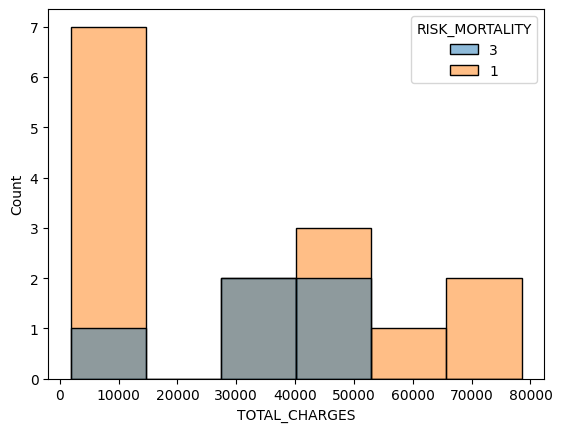

In [11]:
g = sns.histplot(x="TOTAL_CHARGES", hue="RISK_MORTALITY", data=train_data)

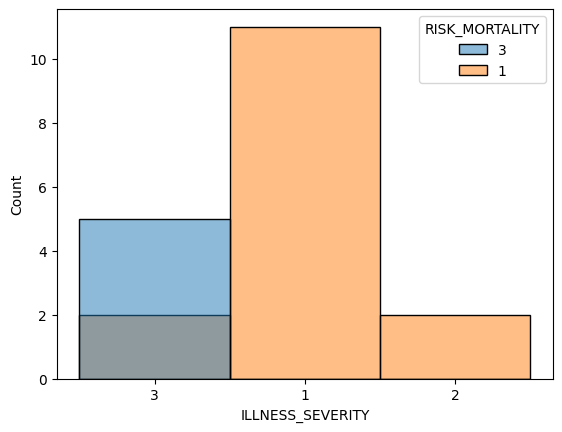

In [12]:
g = sns.histplot(x="ILLNESS_SEVERITY", hue="RISK_MORTALITY", data=train_data)

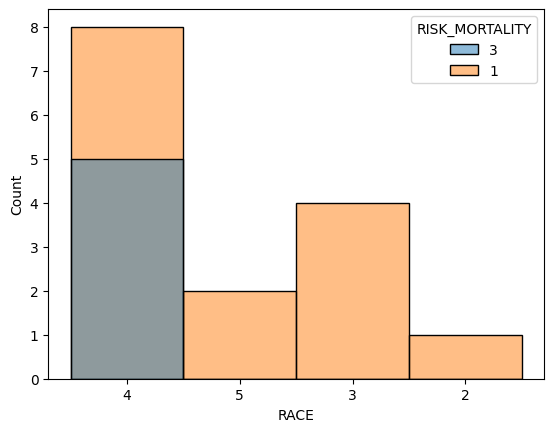

In [13]:
# 4 = white
g = sns.histplot(x="RACE", hue="RISK_MORTALITY", data=train_data)

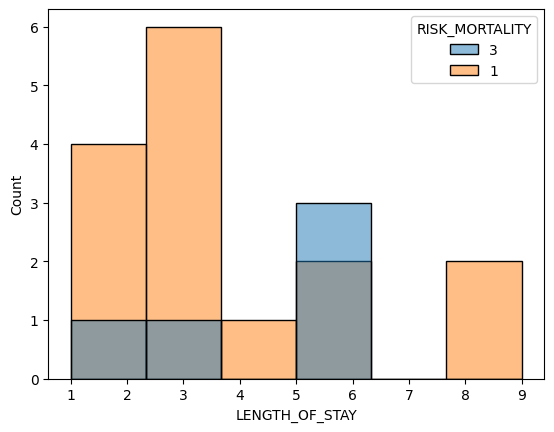

In [14]:
g = sns.histplot(x="LENGTH_OF_STAY", hue="RISK_MORTALITY", data=train_data)

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np

In [16]:
test_dset = Dataset(
        dataset_name="texas",
        dataset_dir="../",
        subset="test",
        data_frac=None,
        transformer=transformer,
        random_state=seed)

train_dset = Dataset(
        dataset_name="texas",
        dataset_dir="../",
        subset="train",
        data_frac=20,
        random_state=seed)

    
test_X = test_dset.train_data[0]
test_y = test_dset.train_data[1]
    
train_data = train_dset.train_data[0]
train_data = test_dset._transformer.transform(train_data)
target_position = test_dset._transformer._target_index
train_y = train_data[:, target_position]
train_X = np.delete(train_data, target_position, axis=1)


dt = DecisionTreeClassifier(random_state=seed)
dt.fit(train_X, train_y)

/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarn

DecisionTreeClassifier(random_state=1000)

In [17]:
test_X.shape, train_X.shape

((15032, 94), (20, 94))

In [18]:
from sklearn.metrics import f1_score, accuracy_score
pred = dt.predict(test_X)
f1_score(test_y, pred), accuracy_score(test_y, pred)

(0.6756651017214398, 0.8897019691325173)

In [19]:
from sklearn.metrics import average_precision_score, classification_report
average_precision_score(test_y, dt.predict_proba(test_X)[:, 1], pos_label=1)

0.5276002857219418

In [20]:
print(classification_report(test_y, dt.predict(test_X)))

              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93     12278
         1.0       0.73      0.63      0.68      2754

    accuracy                           0.89     15032
   macro avg       0.83      0.79      0.80     15032
weighted avg       0.88      0.89      0.89     15032



In [21]:
from utils.misc import get_column_names, feature_importance

In [22]:
column_names = get_column_names(test_dset._transformer)
len(column_names)

95

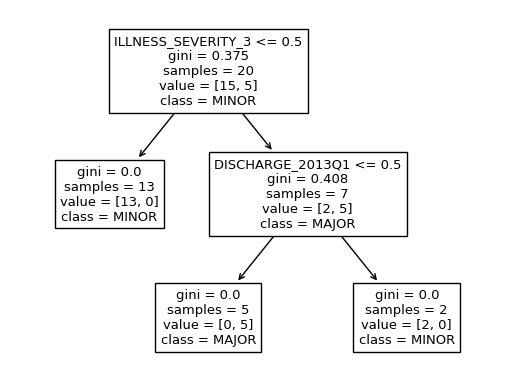

In [23]:
column_names = np.delete(column_names, target_position)
_ = plot_tree(dt, class_names=["MINOR", "MAJOR"], feature_names=column_names)

Text(0.5, 1.0, 'Feature Importance')

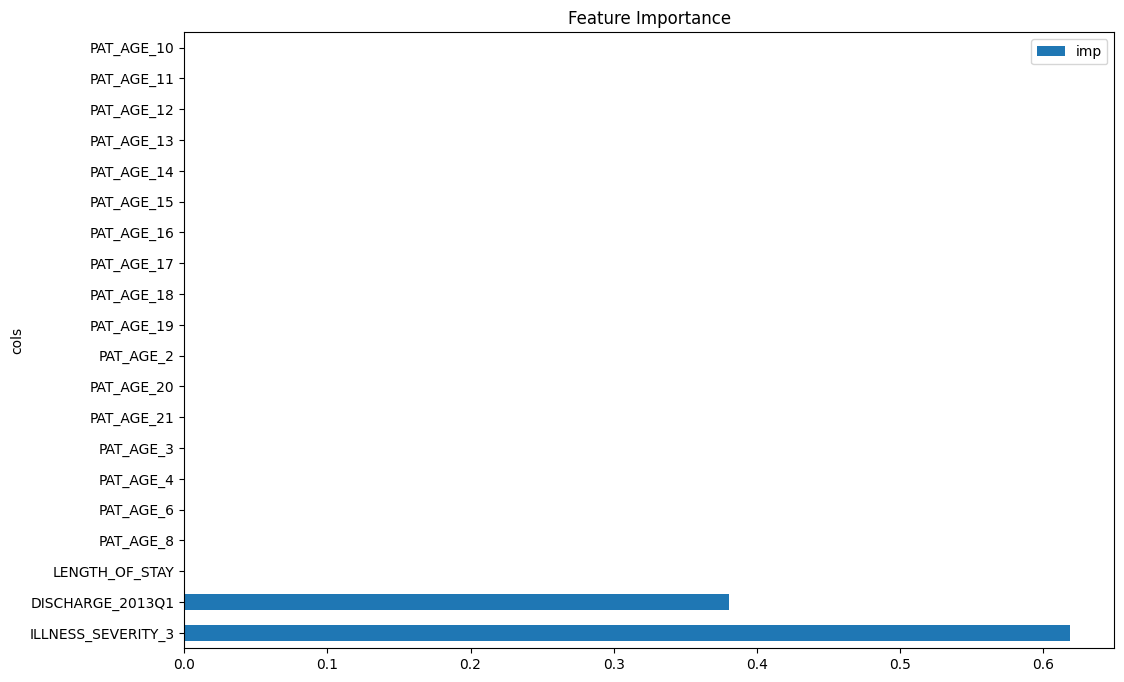

In [24]:
import matplotlib.pyplot as plt

fi = feature_importance(dt, column_names)
fi.head(20).plot(kind='barh', x="cols", figsize=(12, 8))

plt.title("Feature Importance")

In [25]:
train_dset = Dataset(
        dataset_name="texas",
        dataset_dir="../",
        subset="train",
        data_frac=20,
        random_state=seed,
        )

    
train_data_df = train_dset.data

In [26]:
train_data_df[train_data_df["ILLNESS_SEVERITY"].astype(int) < 3]

,LENGTH_OF_STAY,TOTAL_CHARGES,TOTAL_NON_COV_CHARGES,TOTAL_CHARGES_ACCOMM,TOTAL_NON_COV_CHARGES_ACCOMM,TOTAL_CHARGES_ANCIL,TOTAL_NON_COV_CHARGES_ANCIL,TYPE_OF_ADMISSION,PAT_STATUS,RACE,ADMIT_WEEKDAY,ETHNICITY,PAT_AGE,ILLNESS_SEVERITY,DISCHARGE,PAT_STATE,SEX_CODE,RISK_MORTALITY
2,2.0,2400.00,0.0,2400.00,0.0,0.00,0.0,2,1,4,2,2,11,1,2013Q3,TX,F,1
7,5.0,58529.52,0.0,7877.85,0.0,50651.67,0.0,3,1,4,2,1,18,1,2013Q4,TX,M,1
9,3.0,2187.00,0.0,1875.00,0.0,312.00,0.0,4,1,3,4,2,1,1,2014Q3,TX,F,1
10,3.0,51029.00,0.0,4311.00,0.0,46718.00,0.0,9,1,4,3,1,19,1,2013Q3,TX,M,1
11,8.0,36155.74,0.0,8272.00,0.0,27883.74,0.0,3,1,5,3,1,13,1,2014Q1,TX,F,1
12,4.0,78497.80,0.0,3848.40,0.0,74649.40,0.0,3,1,4,3,2,13,1,2014Q3,TX,M,1
13,3.0,28780.81,0.0,2790.00,0.0,25990.81,0.0,3,INVALID,3,2,2,10,2,2013Q3,TX,F,1
14,1.0,2202.64,0.0,1200.00,0.0,1002.64,0.0,4,1,3,2,2,1,1,2014Q1,TX,F,1
15,2.0,4524.25,0.0,1530.00,0.0,2994.25,0.0,4,1,3,4,2,1,1,2014Q4,TX,F,1
16,3.0,2457.00,0.0,1731.00,0.0,726.00,0.0,4,1,4,4,2,1,1,2013Q1,TX,M,1


In [27]:
train_dset.num_cols

['LENGTH_OF_STAY',
 'TOTAL_CHARGES',
 'TOTAL_NON_COV_CHARGES',
 'TOTAL_CHARGES_ACCOMM',
 'TOTAL_NON_COV_CHARGES_ACCOMM',
 'TOTAL_CHARGES_ANCIL',
 'TOTAL_NON_COV_CHARGES_ANCIL']

In [28]:
list(set(train_dset.num_cols) - set(["TOTAL_NON_COV_CHARGES"]))

['TOTAL_CHARGES_ANCIL',
 'TOTAL_NON_COV_CHARGES_ACCOMM',
 'TOTAL_NON_COV_CHARGES_ANCIL',
 'TOTAL_CHARGES',
 'LENGTH_OF_STAY',
 'TOTAL_CHARGES_ACCOMM']

In [29]:
train_data_df[train_dset.num_cols + train_dset.cat_cols + ["TOTAL_NON_COV_CHARGES"]]

,LENGTH_OF_STAY,TOTAL_CHARGES,TOTAL_NON_COV_CHARGES,TOTAL_CHARGES_ACCOMM,TOTAL_NON_COV_CHARGES_ACCOMM,TOTAL_CHARGES_ANCIL,TOTAL_NON_COV_CHARGES_ANCIL,TYPE_OF_ADMISSION,PAT_STATUS,RACE,ADMIT_WEEKDAY,ETHNICITY,PAT_AGE,ILLNESS_SEVERITY,DISCHARGE,PAT_STATE,SEX_CODE,RISK_MORTALITY,TOTAL_NON_COV_CHARGES
0,3.0,11394.88,0.0,2673.00,0.0,8721.88,0.0,3,1,4,2,2,18,3,2013Q2,TX,F,3,0.0
1,1.0,33948.20,0.0,3017.89,0.0,30930.31,0.0,3,1,4,4,2,20,3,2014Q4,TX,F,3,0.0
2,2.0,2400.00,0.0,2400.00,0.0,0.00,0.0,2,1,4,2,2,11,1,2013Q3,TX,F,1,0.0
3,5.0,67473.00,0.0,12342.00,0.0,55131.00,0.0,1,6,4,7,1,15,3,2013Q1,TX,M,1,0.0
4,6.0,31098.50,0.0,7418.00,0.0,23680.50,0.0,1,1,4,7,2,13,3,2013Q4,TX,F,3,0.0
5,6.0,41615.39,0.0,18420.00,0.0,23195.39,0.0,1,4,4,2,2,19,3,2014Q2,TX,M,3,0.0
6,5.0,45620.56,0.0,9075.00,0.0,36545.56,0.0,1,6,4,2,2,16,3,2014Q3,TX,M,3,0.0
7,5.0,58529.52,0.0,7877.85,0.0,50651.67,0.0,3,1,4,2,1,18,1,2013Q4,TX,M,1,0.0
8,9.0,51802.08,0.0,5877.81,0.0,45924.27,0.0,2,1,5,4,1,1,3,2013Q1,TX,F,1,0.0
9,3.0,2187.00,0.0,1875.00,0.0,312.00,0.0,4,1,3,4,2,1,1,2014Q3,TX,F,1,0.0


In [30]:
len(train_data_df[train_data_df["ILLNESS_SEVERITY"].astype(int) < 3])

13

In [31]:
# when the data is imbalanced, the model can find proxy

In [32]:
train_dset = Dataset(
        dataset_name="texas",
        dataset_dir="../",
        subset="train",
        data_frac=None,
        random_state=seed,
        )

    
train_data = train_dset.data
train_data.head()

,LENGTH_OF_STAY,TOTAL_CHARGES,TOTAL_NON_COV_CHARGES,TOTAL_CHARGES_ACCOMM,TOTAL_NON_COV_CHARGES_ACCOMM,TOTAL_CHARGES_ANCIL,TOTAL_NON_COV_CHARGES_ANCIL,TYPE_OF_ADMISSION,PAT_STATUS,RACE,ADMIT_WEEKDAY,ETHNICITY,PAT_AGE,ILLNESS_SEVERITY,DISCHARGE,PAT_STATE,SEX_CODE,RISK_MORTALITY
0,2.0,1057.38,0.0,616.46,0.0,440.92,0.0,4,1,4,5,2,1,1,2014Q1,TX,F,1
1,3.0,3113.25,0.0,1899.00,0.0,1214.25,0.0,4,1,5,5,2,1,1,2013Q3,TX,F,1
2,1.0,5652.75,0.0,746.50,0.0,4906.25,0.0,1,51,4,7,2,16,2,2014Q2,TX,M,3
3,11.0,17875.00,0.0,17875.00,0.0,0.00,0.0,2,1,3,5,2,20,2,2014Q4,TX,F,1
4,9.0,48768.00,0.0,6849.00,0.0,41919.00,0.0,5,1,4,7,2,16,3,2014Q2,TX,F,1


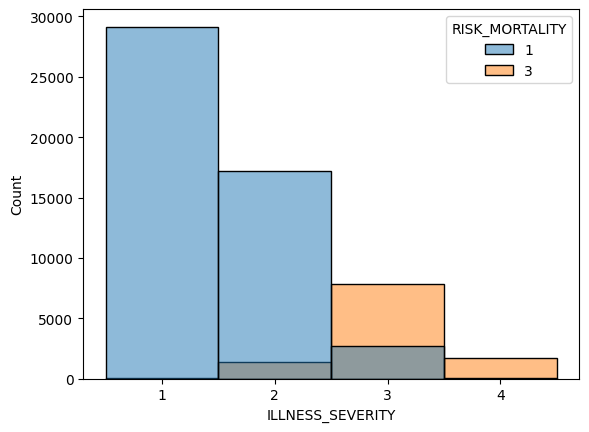

In [33]:
g = sns.histplot(x="ILLNESS_SEVERITY", hue="RISK_MORTALITY", data=train_data)

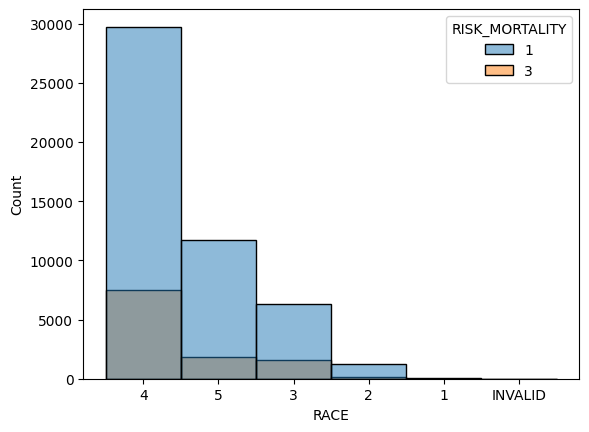

In [34]:
g = sns.histplot(x="RACE", hue="RISK_MORTALITY", data=train_data)

In [35]:
test_dset = Dataset(
        dataset_name="texas",
        dataset_dir="../",
        subset="test",
        data_frac=None,
        transformer=transformer,
        random_state=seed)

train_dset = Dataset(
        dataset_name="texas",
        dataset_dir="../",
        subset="train",
        data_frac=None,
        random_state=seed)

    
test_X = test_dset.train_data[0]
test_y = test_dset.train_data[1]
    
train_data = train_dset.train_data[0]
train_data = test_dset._transformer.transform(train_data)
target_position = test_dset._transformer._target_index
train_y = train_data[:, target_position]
train_X = np.delete(train_data, target_position, axis=1)


dt = DecisionTreeClassifier(max_leaf_nodes=8, random_state=seed)
dt.fit(train_X, train_y)

/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarn

DecisionTreeClassifier(max_leaf_nodes=8, random_state=1000)

In [36]:
pred = dt.predict(test_X)
f1_score(test_y, pred), accuracy_score(test_y, pred)

(0.8626487814094086, 0.9516365087812666)

In [37]:
from sklearn.metrics import average_precision_score, classification_report
average_precision_score(test_y, dt.predict_proba(test_X)[:, 1], pos_label=1)

0.8562144903310305

In [38]:
print(classification_report(test_y, dt.predict(test_X)))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     12278
         1.0       0.90      0.83      0.86      2754

    accuracy                           0.95     15032
   macro avg       0.93      0.90      0.92     15032
weighted avg       0.95      0.95      0.95     15032



In [39]:
column_names = get_column_names(test_dset._transformer)
len(column_names)

95

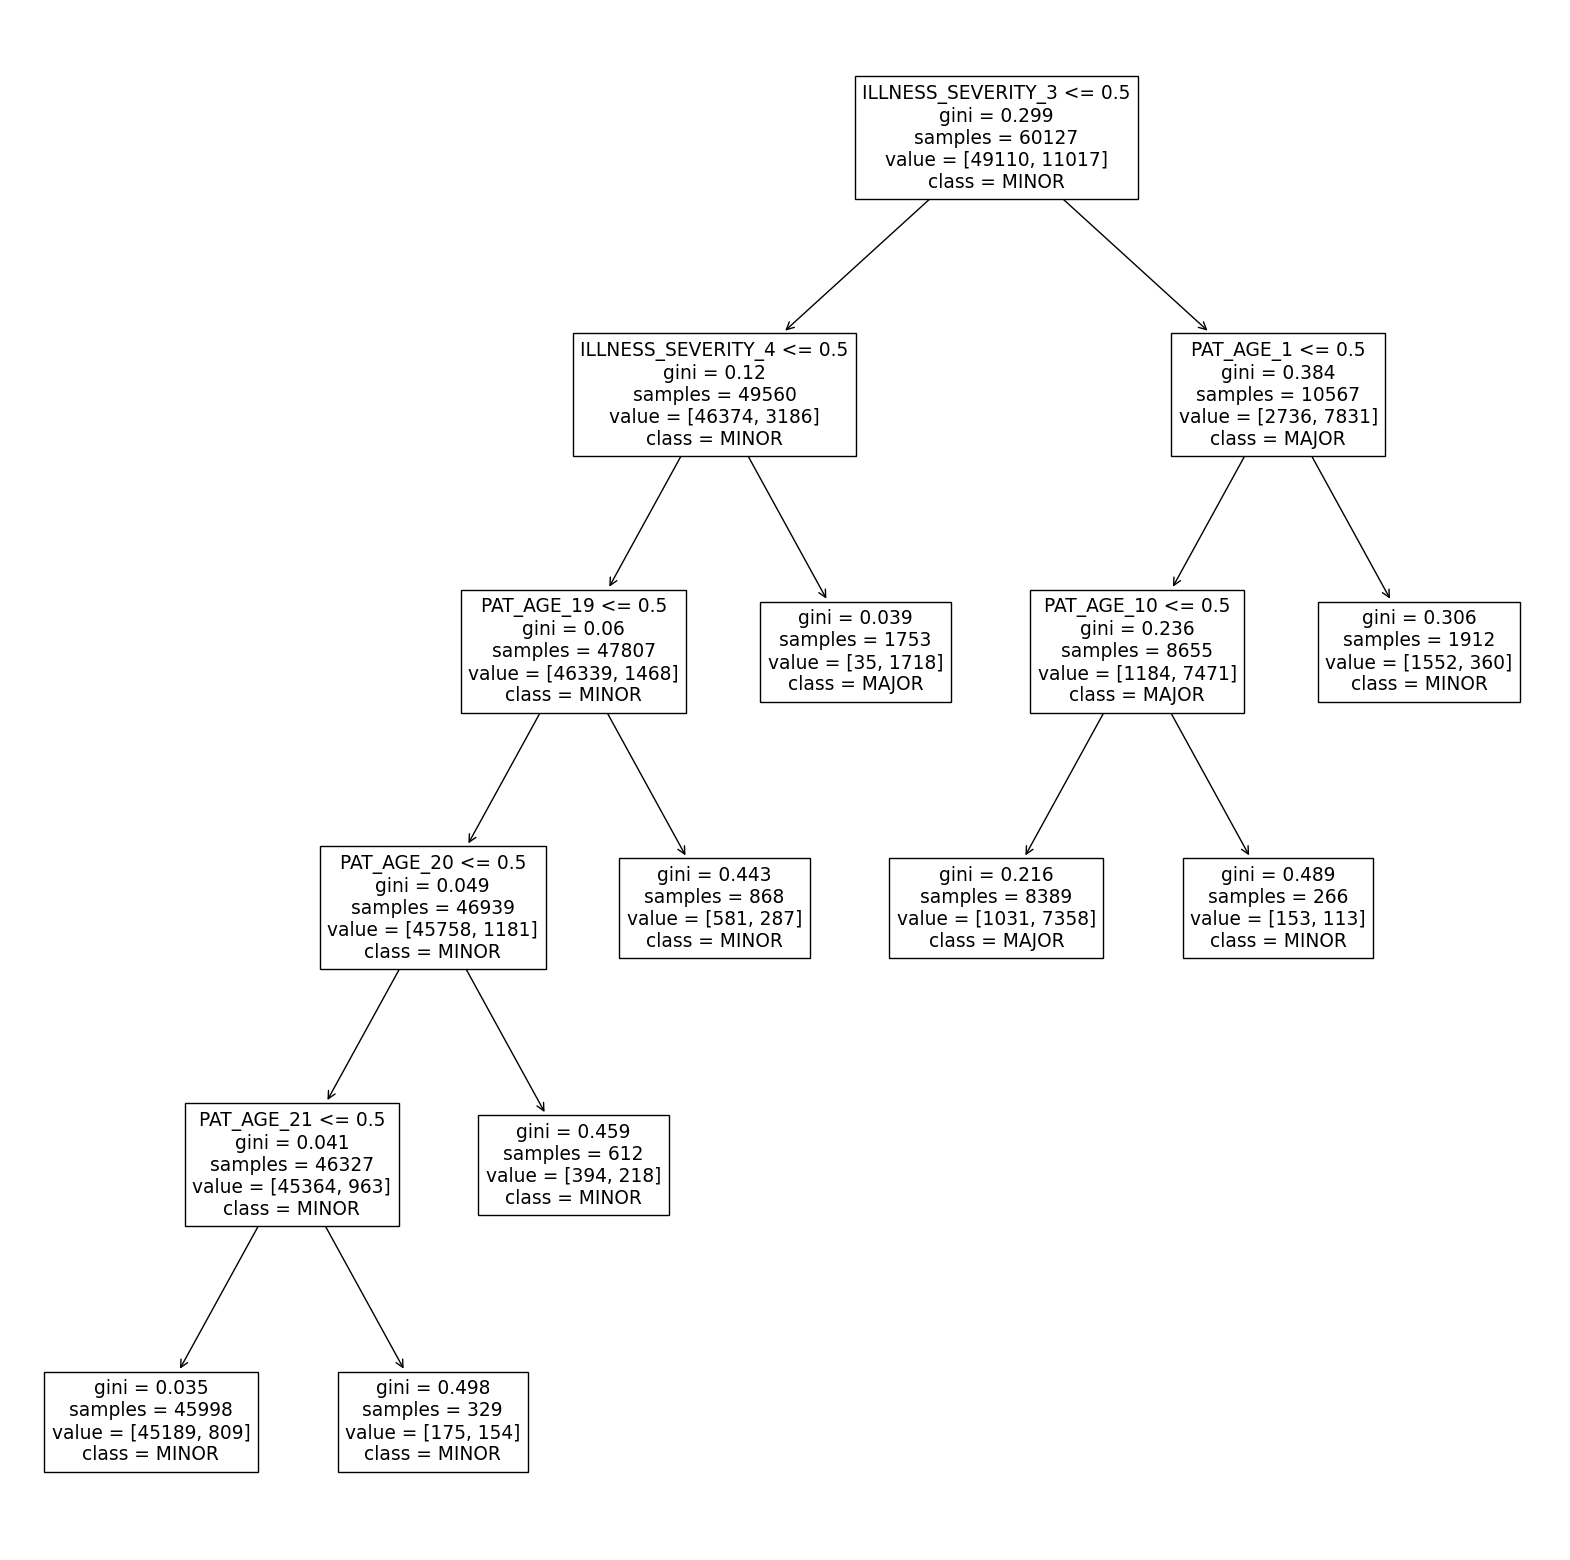

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))

column_names = np.delete(column_names, target_position)
_ = plot_tree(dt, class_names=["MINOR", "MAJOR"], feature_names=column_names)

Text(0.5, 1.0, 'Feature Importance')

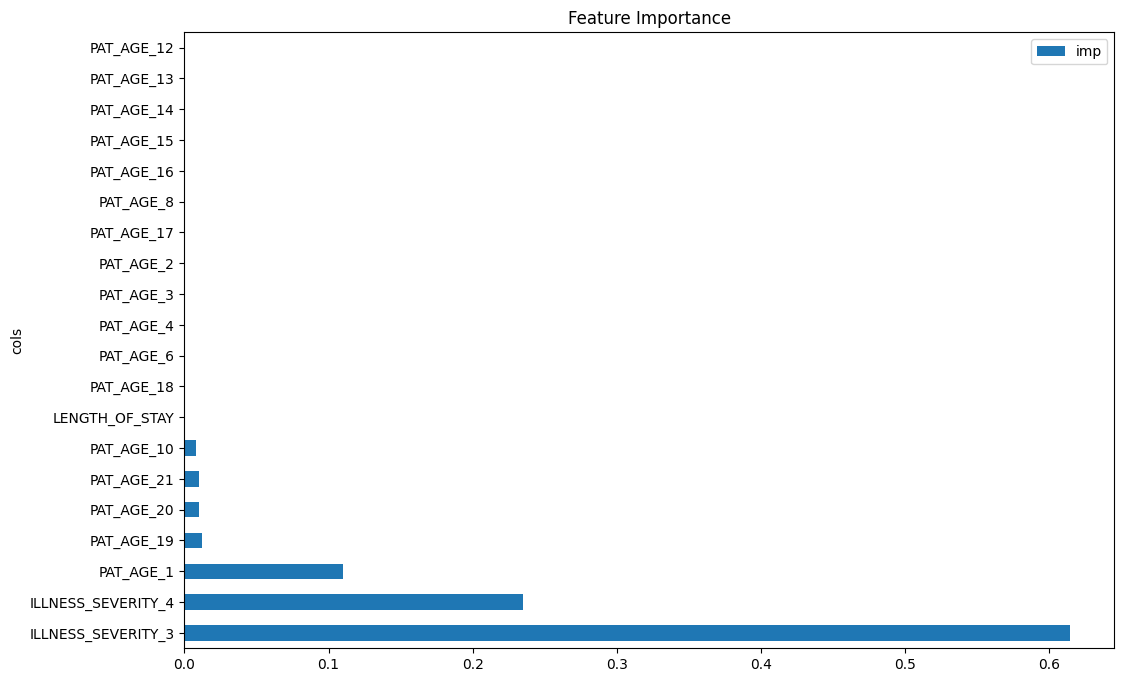

In [41]:
fi = feature_importance(dt, column_names)
fi.head(20).plot(kind='barh', x="cols", figsize=(12, 8))

plt.title("Feature Importance")

In [42]:
# remove ILLNESS_SEVERITY FEATURE
test_dset = Dataset(
        dataset_name="texas",
        dataset_dir="../",
        subset="test",
        data_frac=None,
        transformer=transformer, 
        return_filtered_cols=True,
        random_state=seed)

train_dset = Dataset(
        dataset_name="texas",
        dataset_dir="../",
        subset="train",
        data_frac=None,
        return_filtered_cols=True,
        random_state=seed)

    
test_X = test_dset.train_data[0]
test_y = test_dset.train_data[1]
    
train_data = train_dset.train_data[0]
train_data = test_dset._transformer.transform(train_data)
target_position = test_dset._transformer._target_index
train_y = train_data[:, target_position]
train_X = np.delete(train_data, target_position, axis=1)

print(test_X.shape)

dt = DecisionTreeClassifier(max_leaf_nodes=8, random_state=seed)
dt.fit(train_X, train_y)

/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarn

(15032, 82)


DecisionTreeClassifier(max_leaf_nodes=8, random_state=1000)

In [43]:
pred = dt.predict(test_X)
f1_score(test_y, pred), accuracy_score(test_y, pred)

(0.585699481865285, 0.8670170303352848)

In [44]:
from sklearn.metrics import average_precision_score, classification_report
average_precision_score(test_y, dt.predict_proba(test_X)[:, 1], pos_label=1)

0.6048322774172141

In [45]:
print(classification_report(test_y, dt.predict(test_X)))

              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92     12278
         1.0       0.68      0.51      0.59      2754

    accuracy                           0.87     15032
   macro avg       0.79      0.73      0.75     15032
weighted avg       0.86      0.87      0.86     15032



In [46]:
column_names = get_column_names(test_dset._transformer)
len(column_names)

83

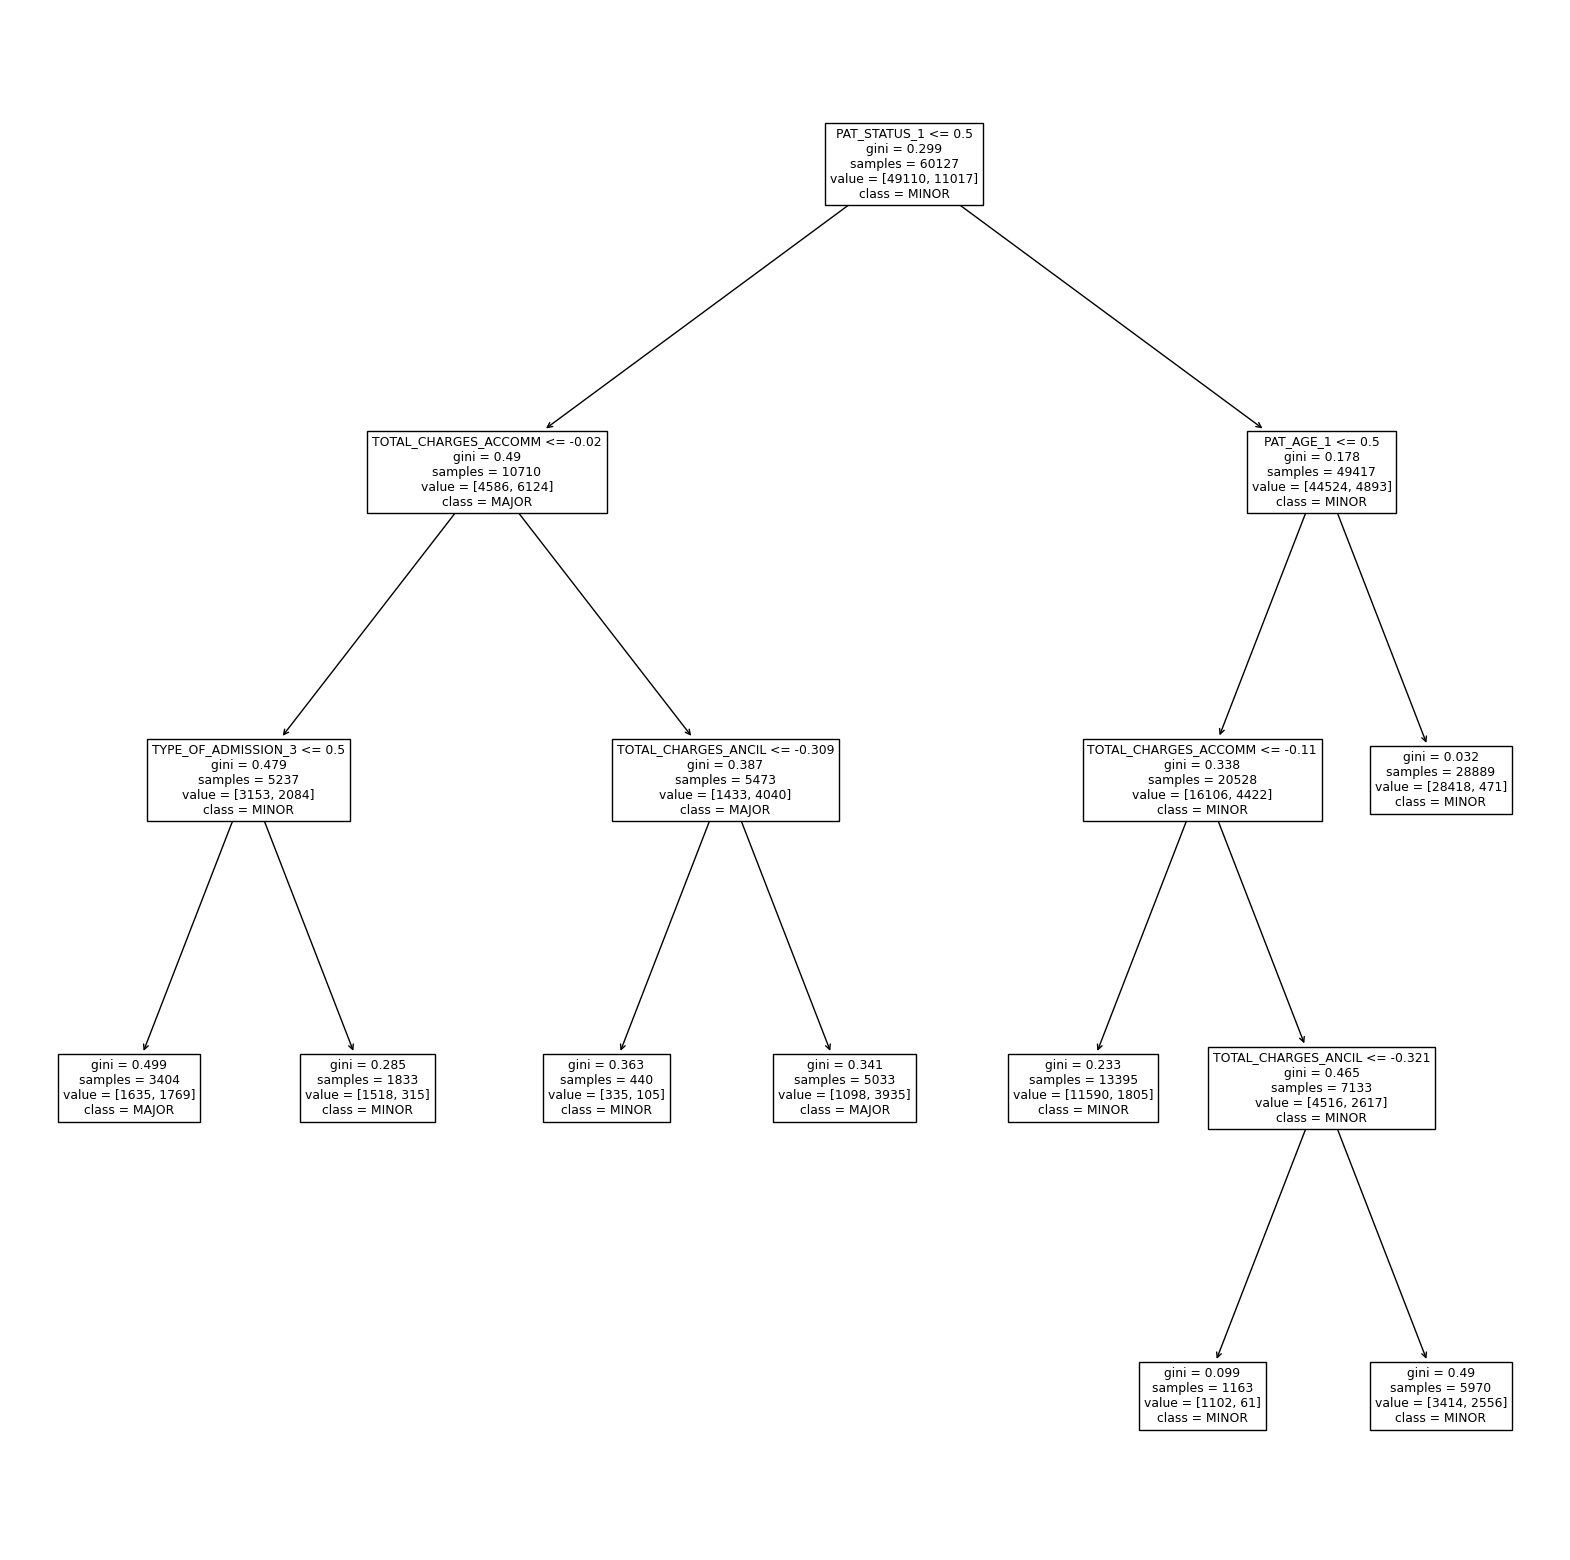

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))

column_names = np.delete(column_names, target_position)
_ = plot_tree(dt, class_names=["MINOR", "MAJOR"], feature_names=column_names)

Text(0.5, 1.0, 'Feature Importance')

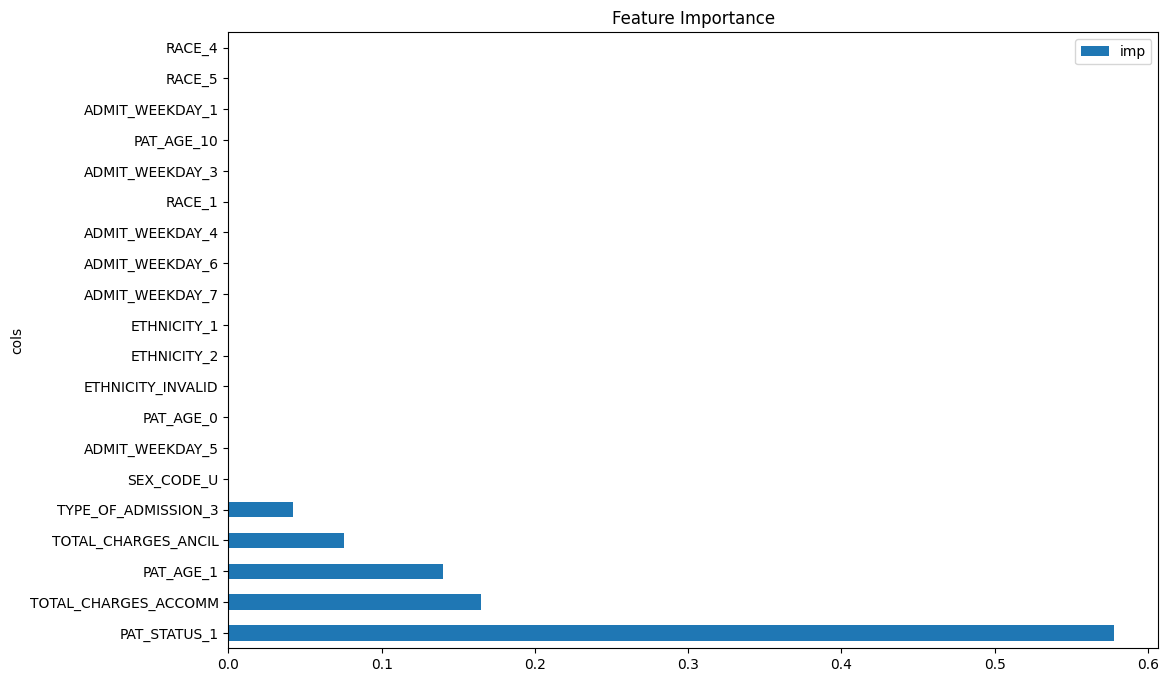

In [48]:
fi = feature_importance(dt, column_names)
fi.head(20).plot(kind='barh', x="cols", figsize=(12, 8))

plt.title("Feature Importance")